<a href="https://colab.research.google.com/github/dvpaa/Hands-on-Machine-Learning/blob/main/Chapter%2008%20%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**8장 – 차원 축소**

_이 노트북은 8장에 있는 모든 샘플 코드와 연습문제 해답을 가지고 있습니다._

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/handson-ml2/blob/master/08_dimensionality_reduction.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 설정

먼저 몇 개의 모듈을 임포트합니다. 맷플롯립 그래프를 인라인으로 출력하도록 만들고 그림을 저장하는 함수를 준비합니다. 또한 파이썬 버전이 3.5 이상인지 확인합니다(파이썬 2.x에서도 동작하지만 곧 지원이 중단되므로 파이썬 3을 사용하는 것이 좋습니다). 사이킷런 버전이 0.20 이상인지도 확인합니다.

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### PCA
3D 데이터셋을 만듭니다:

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

### 주성분

$X = U \sum V^T$ 에서 $V$가 주성분

* (m, m) (m, n) (n, n)

m: 샘플 개수, n: 특성 개수

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [4]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [5]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

## 3.3 d 차원으로 투영하기
주성분을 모두 추출했다면 처음 d개의 주성분으로 정의한 초평면에 투영하여 데이터셋의 차원을 d차원으로 축소 할 수 있다. 
- 이 초평면은 분산을 가능한 한 최대로 보존하는 투영을 보장한다.

초평면에 훈련세트를 투영하고 d차원으로 축소된 데이터셋 Xd-proj을 얻기 위해서는 아래와 같이 행렬 X와 V의 첫 d열로 구성된 행렬 Wd를 행렬 곱셈하면 된다

$$X_[d-proj]=XxW_d$$

In [6]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [7]:
X2D_using_svd = X2D

## 3.4사이킷런 사용하기

사이킷런의 PCA모델은 SVD 분해 방법을 사용하여 구현
PCA 모델을 사용해 데이터셋의 차원을 2로 줄이는 코드

PCA 변환기를 데이터셋에 학습시키면, components_ 속성에 W^d의 전치가 담겨 있다
(ex. 첫 번째 주성분을 정의하는 단위 벡터는 pca.components_.T[:,0])

사이킷런에서는 PCA가 아주 간단합니다. 데이터셋에서 평균을 빼는 작업도 대신 처리해 줍니다:

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [9]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [10]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

데이터셋을 조금 다르게해서 PCA를 실행하면 결과가 달라질 것입니다. 일반적으로 달라지는 것은 일부 축이 반대로 바뀌는 정도입니다. 이 예에서 사이킷런의 PCA는 두 축이 반대로 뒤집힌 것외에는 SVD 방식을 사용한 것과 통일한 투영 결과를 만듭니다:

In [11]:
np.allclose(X2D, -X2D_using_svd)

True

평면(PCA 2D 부분공간)에 투영된 3D 포인트를 복원합니다.

In [12]:
X3D_inv = pca.inverse_transform(X2D)

물론, 투영 단게에서 일부 정보를 잃어버리기 때문에 복원된 3D 포인트가 원본 3D 포인트와 완전히 똑같지는 않습니다:

In [13]:
np.allclose(X3D_inv, X)

False

재구성 오차를 계산합니다:

In [14]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.01017033779284855

SVD 방식의 역변환은 다음과 같습니다:

In [15]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

사이킷런의 `PCA` 클래스는 자동으로 평균을 뺏던 것을 복원해주기 때문에 두 방식의 재구성 오차가 동일하지는 않습니다. 하지만 평균을 빼면 동일한 재구성을 얻을 수 있습니다:

In [16]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

`PCA` 객체를 사용하여 계산된 주성분을 참조할 수 있습니다:

In [17]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

SVD 방법으로 계산된 처음 두 개의 주성분과 비교해 보겠습니다:

In [18]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

축이 뒤집힌 것을 알 수 있습니다.

# 8. 차원 축소

### **1. 차원의 저주**
- 많은 머신러닝 문제는 훈련 샘플이 각각 수천 수백만개의 특성을 가지고 있음
- 이런 많은 특성은 훈련을 느리게 할 뿐만 아니라, 좋은 솔루션을 찾기 어렵게 만듦
- 이러한 차원의 저주 문제들은 특성 수를 크게 줄여 불가능한 문제를 가능한 범위로 변경할 수 있음
  - MNIST 이미지처럼, 이미지 경계에 있는 픽셀은 거의 흰색이므로 훈련세트에서 이런 픽셀을 제거해도 많은 정보를 잃지 않음
  - 인접한 픽셀은 종종 많이 연관되어 있으므로, 두 픽셀을 하나로 합치더라도 잃는 정보가 많지 않음

훈련속도를 높이는 것 외에 차원 축소를 데이터 시각화에도 융ㅅㅇ
  - 차원수를 둘로 줄아면 고차원 훈련 세트를 하나의 압축된 그래프로 그릴 수 있으며,
  - 군집 같은 시각적인 패턴을 감지해 통찰을 얻는 경우가 많음
  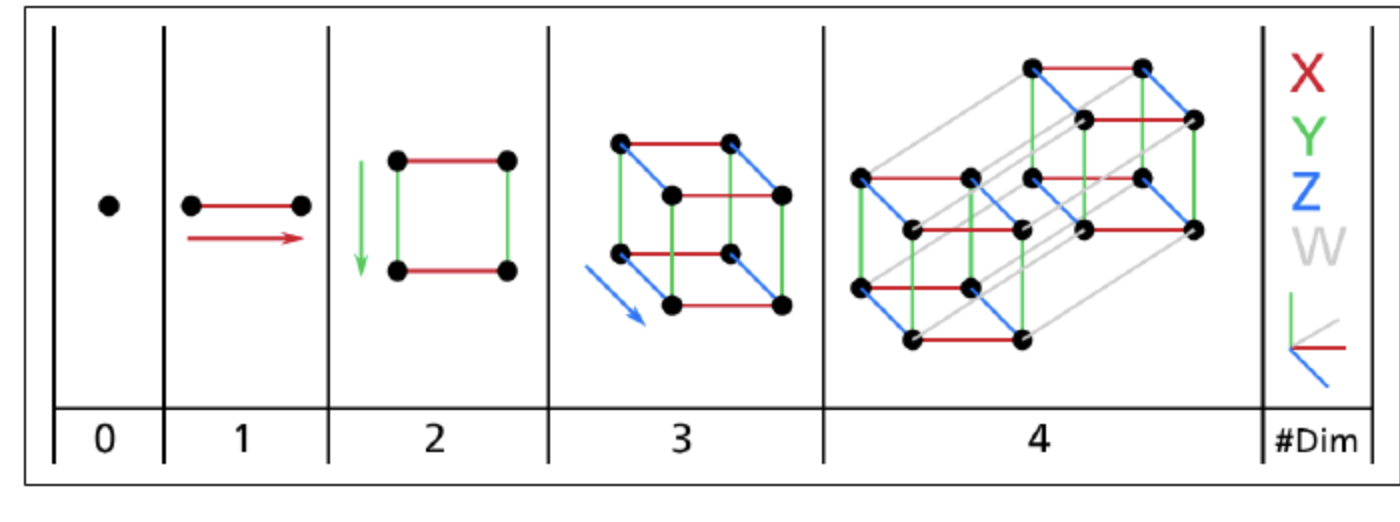

  


**고차원 공간, 고차원 데이터셋**
- 단위 면적(1x1 사각형)에서 임의의 두 점 사이의 거리는 평균적으로 대략 0.52
- 3차원 큐브에서 임의의 두 점을 선택하면 평균 거리는 대략 0.66
- 1,000,000차원의 초입방체에서 두 점을 무작위로 선택하며느 평균거리는 약 407.25
  -> 고차원은 많은 공간을 가지고 있기 때문
- 이로 인해 고차원 데이터셋은 매우 희박할 위험이 있다.
- 즉, 대부분의 훈련 데이터가 서로 멀리 떨어져 있으며, 새로운 샘플도 훈련 샘플과 멀리 떨어져 있을 가능성이 높음
  - 이경우 예측을 위해 많은 외삽(extrapolation)을 해야 하므로 저차원일 때보다 예측이 더 불안정

  - 훈련세트의 차원이 클수록 과대적합 위험이 커짐

차원의 저주를 해결하기 위해 훈련 샘플의 밀도가 충분히 높아질 때까지 훈련 세트의 크기를 키우는 이론적인 방법이 있지만, 훈련 샘플의 수가 기하급수적으로 늘어난다.

### 2.**차원 축소를 위한 접근 방법**

 : 차원을 감소시키는 두 가지 주요한 접근법, 투영과 매니폴드

 2-1 투영
  대부분 실전 문제는 훈련 샘플이 모든 차원에 걸쳐 균일하게 퍼져있지 않는다.
  - 많은 특성은 거의 변화가 없는 편이다.
  - 그 외 특성은 서로 강하게 연관되어 있다.
  -> 모든 훈련 샘플이 고차원 공간 안의 저차원 부분 공간에 놓여 있음 (또는 가까이 놓여 있다.)

## 3.5 설명된 분산의 비율

주성분의 설명된 분산의 비율은 explained_variance_ratio_변수에 저장되어 있음
- 이 비율은 각 주성분의 축을 따라 있는 데이터셋의 분산 비율을 나타냄

이제 설명된 분산 비율을 확인해 보겠습니다:

In [19]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

첫 번째 차원이 84.2%의 분산을 포함하고 있고 두 번째는 14.6%의 분산을 설명합니다.

2D로 투영했기 때문에 분산의 1.1%을 잃었습니다:

In [20]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

SVD 방식을 사용했을 때 설명된 분산의 비율을 계산하는 방법은 다음과 같습니다(`s`는 행렬 `S`의 대각 성분입니다):

In [21]:
np.square(s) / np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

**<그림 8-2. 2차원에 가깝게 배치된 3차원 데이터셋> 생성 코드**

3D 화살표를 그래기 위한 유틸리티 클래스입니다(http://stackoverflow.com/questions/11140163 에서 복사했습니다)

In [22]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

x와 y의 함수로 평면을 표현합니다.

In [23]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

3D 데이터셋, 평면 그리고 이 평면으로의 투영을 그립니다.

## 2.1 투영
대부분 실전 문제는 훈련 샘플이 모든 차원에 걸쳐 균일하게 퍼져 있지 않음
- 많은 특성은 거의 변화가 없는 반면,
- 그 외 특성들은 서로 강하게 연관되어 있음
=> 모든 훈련 샘플의 고차원 공간 안의 저차원 부분공간에 놓여있음( 또는 가까이 놓여있음)

그림 저장 dataset_3d_plot


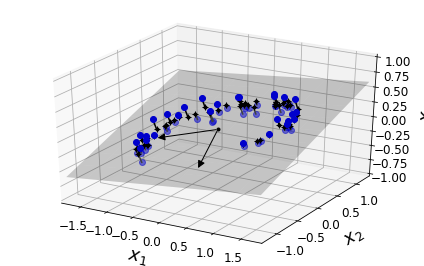

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
        pass
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "-", color="#505050")
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18, labelpad=10)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=10)
ax.set_zlabel("$x_3$", fontsize=18, labelpad=10)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

# Note: 맷플롯립 3.0.0 버전은 버그가 있기 때문에
# 3D 그래프를 잘 출력하지 못합니다.
# https://github.com/matplotlib/matplotlib/issues/12239 를 참조하세요.
# 따라서 최신 버전으로 업그레이드해야 합니다.
# 만약 업그레이드할 수 없다면 3D 그래프를 그리기 전에 다음 코드를 실행하세요:
# for spine in ax.spines.values():
#     spine.set_visible(False)

save_fig("dataset_3d_plot")
plt.show()

- 모든 훈련 샘플이 거의 평면 형태로 놓여 있음 => 고차원(3D) 공간에 있는 저차원(2D) 부분 공간에 놓여있음
- 모든 훈련 샘플을 이 부분 공간에 수직으로( 샘플과 평면 사이의 가장 짧은 직선을 따라) 투영하면 아래와 같은 2D 데이터 셋이 됨

**<그림 8-3. 투영하여 만들어진 새로운 2D 데이터셋> 생성 코드**

그림 저장 dataset_2d_plot


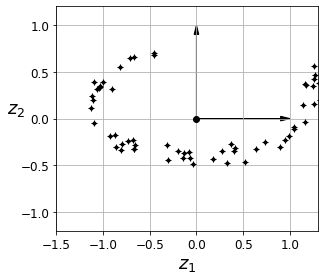

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)
save_fig("dataset_2d_plot")

- 데이터 셋의 차원을 3D에서 2D로 줄인 상태.
- 각 축은 (평면에 투영된 좌표인) 새로운 특성 Z1 과 Z2에 대응된다.

**투영이 언제나 최선의 방법은 아니다**

**<그림 8-4. 스위스롤 데이터셋> 생성 코드**

In [26]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

그림 저장 swiss_roll_plot


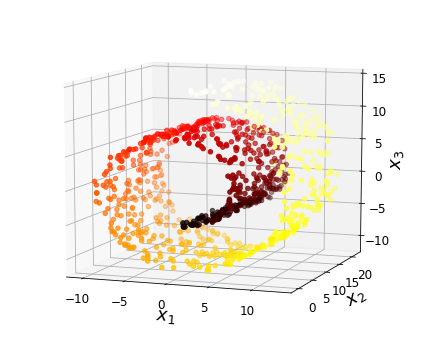

In [27]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("swiss_roll_plot")
plt.show()

- 위 스위스 롤 데이터셋 처럼 부분 공간이 뒤틀리거나 휘어 있기도 한다.
- 그냥 평면에 투영시킴면(예를 들어 x3을 버리고) 아래 왼쪽 같은 2D 데이터셋을 얻게 된다

**<그림 8-5. 평면에 그냥 투영시켜서 뭉개진 것(왼쪽)과 스위스 롤을 펼쳐 놓은 것(오른쪽)> 생성 코드**

그림 저장 squished_swiss_roll_plot


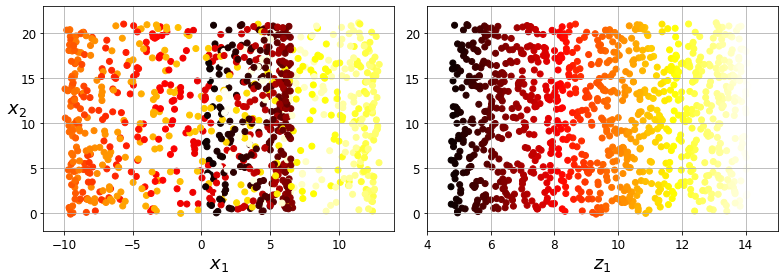

In [28]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

save_fig("squished_swiss_roll_plot")
plt.show()

- 왼쪽 그래프는 보이는 것처럼 그냥 평면애 투영 시키면 스위스 롤의 층이 서로 뭉개짐
- 이상적인것은 오른쪽처럼 스위스 롤을 펼친 2D 데이터셋을 얻는 것이다.

**<그림 8-6. 저차원에서 항상 간단하지 않은 결정 경계> 생성 코드**

## 2. 매니폴드 학습

**2D 매니폴드** 
- 스위스 롤은 2D 매니폴드의 한 예 이다.
- 2D 매니폴드는 고차원 공간에서 휘어지거나 뒤틀린 2D 모양
- d차원 매니폴드는 국부적으로 d차원 초평면으로 보일 수 있는 n차원 공간의 일부(d<n)

**매니폴드 학습** (manifold leraning)
- 많은 차원 축소 알고리즘이 훈련 샘플이 놓여있는 매니폴드를 모델하는 식으로 작동 -> **매니폴드 학습**
- 대부분 실제 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다는 매니폴드 가정 또는 매니폴드 가설에 근거

**MNIST 데이터셋** 
- 전체 손글씨 숫자 이미지는 어느 정도 비슷함(선으로 연결, 경계는 흰색, 어느정도 중앙)
- 무작위로 생성된 이미지라면 아주 적은 일부만 손글씨 숫자처럼 보임
- 숫자 이미지를 만들 때 가능한 자유도는 아무 이미지나 생성할 때의 자유도보다 훨씬 낮음 

 => 이런 제약은 데이터셋을 저차원 매니폴드로 압축할 수 있도록 도와줌

**매니폴드 가정** (manifold assumption)
- 매니폴드 가정은 암묵적으로 다른 가정과 병행되곤 함
=> 처리해야할 작업(예를들면 분류나 회귀)이 저차원의 매니폴드 공간에 표현되면 더 간단해질 것이란 가정

그림 저장 manifold_decision_boundary_plot1


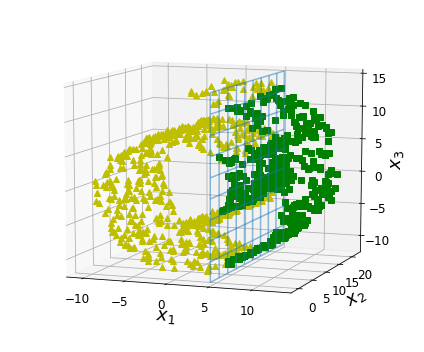

그림 저장 manifold_decision_boundary_plot2


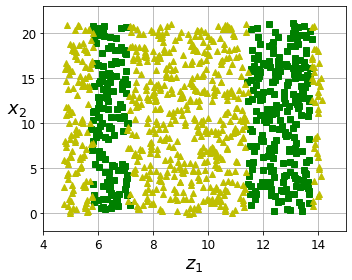

그림 저장 manifold_decision_boundary_plot3


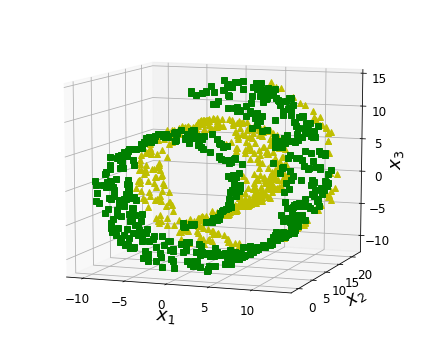

그림 저장 manifold_decision_boundary_plot4


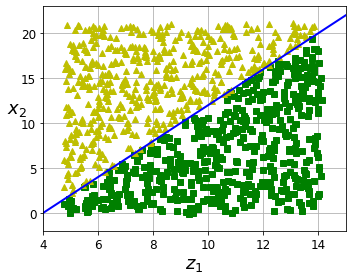

In [29]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("manifold_decision_boundary_plot1")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

save_fig("manifold_decision_boundary_plot2")
plt.show()

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("manifold_decision_boundary_plot3")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

save_fig("manifold_decision_boundary_plot4")
plt.show()

- 1번과 2번 그림을 보게 되면 스위스 롤이 두 개의 클래스로 나누어져 있다.
- 3D 즉 1번 그림을 보게 되면 결정 경계가 매우 복잡하지만 펼쳐진 매니폴드 공간인 2D 즉 2번그림에서는 결정 경계가 단순한 직선이다.

-이러한 암묵적인 가정이 항상 유효하지는 않는다. 
- 3번째 와 4번째 그림을 보면 결정경계가 x1=5에 놓여있다.
- 이 결정 경계는 3D 공간에서는 매우 단순하다(수직 평면)
- 하지만 4번째 그림 즉 펼쳐진 매니폴드에서는 경정 경계가 더 복잡해진다.( 4개의 독립된 수직선)

모델을 훈련시키기 전에 훈련 세트의 차원을 감소시키면 훈련 속도는 빨라지지만 항상 더 낫거나 간단한 솔루션이 되는것은 아니다. -> 이 경우 데이터셋에 따라 달라진다.


**<그림 8-7. 투영할 부분 공간 선택하기> 생성 코드**

# 3.PCA 
  
  **주성분 분석** (PCA, Principal Component Analiysis)
  - 가장 인기 있는 차원 알고리즘
  - **데이터에 가장 가까운 초평면을 정의한 후, 데이터를 이 평면에 투영시킨다.**


###  3.1 분산 보존
  - 저차원의 초평면에 훈련 세트를 투영하기 전에 먼저 올바른 초평면을 선택해야 한다. 

그림 저장 pca_best_projection_plot


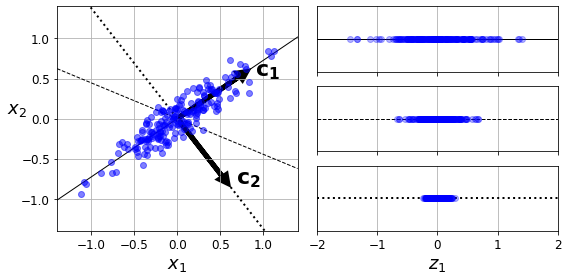

In [30]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

save_fig("pca_best_projection_plot")
plt.show()

- 왼쪽 그래프는 간단한 2D 데이터셋이 세 갸의 축과 함꼐 표현되어 있음
- 오른쪽 그래프는 데이터셋이 각 축에 투영된 결과이다.
- 실선에 투영된 것은 분산을 최대한 보존하는 반면, 점선에 투영된것은 분산을 매우 적게 유지하고 있다.
- 가운데 파선에 투영된 것은 중간 정도로 분산을 유지하고 있다.
- 맨위는 실선 c1축에 투영된 결과이고, 중간은 파선에 투영된 결과이며, 맨아래 그래프는 점선 c2에 투영된 결과이다.
- 다른 방향으로 투영하는 것보다 분산이 최대한 보존하는 축을 선택하는 것이 정보가 가장 적게 손실되므로 합리적으로 보임
  - 원본 데이터셋과 투영된 것 사이의 평균 제곱거리를 최소화하는 축이다.

### 3.2 주성분

**PCA는 훈련 세트에서 분산이 최대인 축을 찾는다** 
- 위 그림에서는 실선이다.
- 또한 첫 번째 축에 직교하고 남은 분산을 최대한 보존하는 두 번째 축을 찾는다. 
- 고차원 데이터 셋이라면 PCA는 이전의 두 축에 직교하는 세번째 축을 찾으며 데이터셋에 있는 차원의 수만큼 n 번째 축을 찾는다.
- i 번째 축을 이 데이터의 i번째 주성분(PC)라고 부름

    - 위 그림에서 첫 번째 pc는 벡터 c1이 놓인 축이고
    - 두 번째 pc는 벡터 c2가 놓인 축이다.

**특잇값 분해(SVD)**

  - 훈련 세트의 주성분을 찾는 방법
  - 표준 행렬 분해 기술로, 훈련 세트 행렬 X를 세 개 행렬의 행렬 곱셉인 $$UΣV^t$$ 로 분해 가능하다.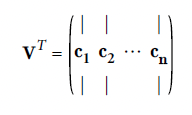

- 여기서 찾고자 하는 모든 주성분의 단위 벡터가 위와 같이 담겨져 있다.

svd()함수를 사용해 훈련 세트의 모든 주성분을 구한 후 처음 두개의 PC를 정의하는 두 개의 단위 벡터를 추출하는 코드

In [31]:
X_centered=X-X.mean(axis=0)
U, s, Vt= np.linalg.svd(X_centered)
c1=Vt.T[:,0]
c2=Vt.T[:,1]

- PCA는 데이터셋의 평균이 0이라고 가정
- 사이킷런의 PCA 파이썬 클래스는 이 작업을 대신 처리하지만, PCA는 구현하거나 다른 라이브러리를 사용한다면 먼저 데이터를 원점에 맞추어야 한다.

##3.6 적절한 차원수 선택하기

축소할 차원의 수를 임의로 정하기 보다는
충분한 분산(ex.95%)이 될때까지 더해야 할 차원의 수를 선택하는 것이 간단하다.

(데이터 시각화를 위해 축소하는 경우 차원을 2~3개로 줄이는 것이 일반적이다.)



In [32]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [33]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

차원을 축소하지 않고 PCA를 계산한 뒤 훈련세트의 분산을 95%로 유지하는 데 필요한 최소한의 차원 수를 계산하는 코드

In [34]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [35]:
d

154

**<그림 8-8. 차원 수에 대한 함수로 나타낸 설명된 분산> 생성 코드**

설명된 분산을 차원 수에 대한 함수로 그리는 것(cumsum을 그래프로 그림)
- 이 그래프에는 설명된 분산의 빠른 성장을 멈추는 변곡점이 있다.
- 여기서는 차원을 약 100으로 축소해도 설명된 분산을 크게 손해 보지 않는다.

그림 저장 explained_variance_plot


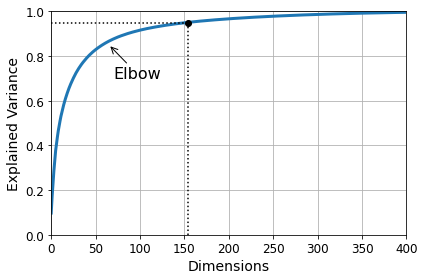

In [36]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

In [37]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [38]:
pca.n_components_

154

In [39]:
np.sum(pca.explained_variance_ratio_)

0.9504334914295707

## 3.7 압축을 위한 PCA
**차원을 축소하고 난 후에는 훈련 세트의 크기가 줄어듦**

MNIST 데이터셋에 분산을 95%를 유지하도록 PCA 적용
- 각 샘플은 원래의 784개 특성이 아닌 150개 정도 가지고 있을 것이다.
- 대부분 분산은 유지되었지만 데이터셋은 원본 크기의 20% 미만이됨
=> 상당한 압축률, 이런 크기 축소는 (SVM 같은) 분류 알고리즘의 속도를 크게 높일 수 있음

압축된 데이터셋에 PCA 투영의 변환을 반대로 적용하여 784개의 차원으로 되돌릴 수도 있음
- 투영에서 일정량의 정보(유실된 5%의 분산)를 잃어버렸기 때문에 이렇게 해도 원본 데이터셋을 얻을 수 없다.
- 그러나 원본 데이터와 매우 비슷하다.
- 원본 데이터와 재구성된 데이터 사이의 평균 제곱 거리를 재구성 오차라고 함

MNIST 데이터셋을 154 차원으로 압축하고 inverse_transform()메서드를 사용해 784차원으로 복원


**차원을 축소하고 난 후에는 훈련 세트의 크기가 줄어듦**


In [40]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

**<그림 8-9. 분산의 95%가 유지된 MNIST 압축> 생성 코드**

In [41]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일합니다:
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가합니다:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성합니다:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합칩니다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합칩니다:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

그림 저장 mnist_compression_plot


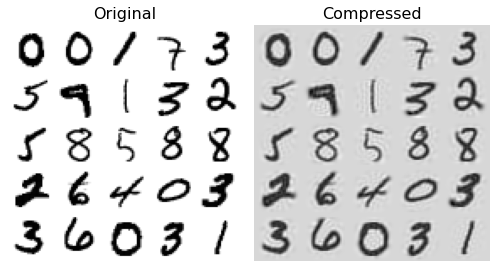

In [42]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")

역변환 공식
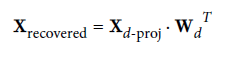

In [43]:
X_reduced_pca = X_reduced

## 3.8랜덤 PCA

확률적 알고리즘을 사용해 처음 d 개의 주성분에 대한 근삿값을 빠르게 찾음
- 사이킷런 scd_solver 매개변수를 "radomized"로 지정
- 계산 복잡도는 완전한 SVD 방식이 아니라 $O(m * n^2)+O(n^3)$ 이 아닌, **$O(m * d^2)+O(d^3)$**
- 따라서 d가 n보다 많이 작으면 완전 SVD 보다 훨신 빠름



In [44]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

- svd_solver의 기본값은 "auto"
- m이 n이 500보다 크므로 d가 m이나 n의 80%보다 작으면 사이킷런은 자동으로 랜덤 PCA 알고리즘 사용
- 아니면 완전한 SVD 방식을 사용(svd_solver="full") 

## 3.9점진적 PCA

PCA 구현의 문제는 SVD 알고리즘울 실행하기 위해 전체 훈련 세트를 메모리에 올려야 한다는 것
-> **점진적 PCA 알고리즘**으로 해결

점진적 PCA는 훈련 세트를 미니배치로 나눈 뒤 IPCA 알고리즘에 한 번에 하나씩 주입
- 훈련 세트가 클 때 유용하고 온라인으로 PCA를 적용할 수 있음(새로운 데이터가 준비되는 대로 실시간 PCA 적용 가능)

MNIST 데이터셋을 100개의 미니배치로 나누고 IncrementalPCA 클래스에 주입하여 데이터셋의 차원을 (이전과 같은 ) 154개로 줄이는 코드

In [45]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # 책에는 없음
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [46]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

압축이 잘 되었는지 확인해 보죠:

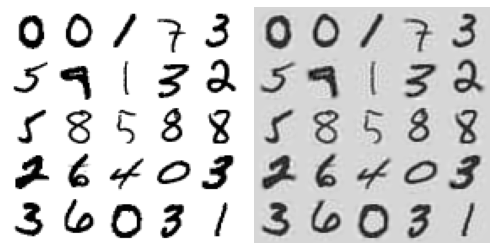

In [47]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [48]:
X_reduced_inc_pca = X_reduced

일반 PCA와 점진적 PCA로 MNIST 데이터를 변환한 결과를 비교해 보겠습니다. 먼저 평균이 같은지 확인합니다: 

In [49]:
np.allclose(pca.mean_, inc_pca.mean_)

True

하지만 결과는 완전히 동일하지 않습니다. 점진적 PCA는 아주 훌륭한 근사치를 제공하지만 완벽하지는 않습니다:

In [50]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

**`memmap()` 사용하기**

`memmap()` 구조를 만들고 MNIST 데이터를 복사합니다. 이는 일반적으로 별도의 프로그램에서 먼저 수행됩니다:

In [51]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

이제 데이터가 디스크에 저장되었는지 확인하기 위해 `memmap()` 객체를 삭제합니다.

In [52]:
del X_mm

다음에 다른 프로그램에서 데이터를 로드하여 훈련에 사용합니다:

또 다른 방법은 넘파이의 maㅡmap 클래스르 사용해 하드 디스크의 이진 파일에 저장된 매우 큰 배열을 메모리에 들어 있는 것처럼 다루는 것
- 이 클래스는 필요할때 데이터를 메모리에 적재한다.
- IncrementalPCA 특정 순간에 배열의 일부만 사용하기 때문에 메모리 부족 문제를 해결 가능
- fit() 메소드 사용 가능

In [53]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, n_components=154)

**시간 복잡도**

주성분 개수를 바꾸어가며 점진적 PCA와 랜덤 PCA에 비해 일반 PCA 시간을 재어보겠습니다:

In [54]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

In [55]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components, svd_solver="full")
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} 초".format(pca.__class__.__name__, t2 - t1))

n_components = 2
    PCA: 9.1 초
    IncrementalPCA: 17.3 초
    PCA: 2.5 초
n_components = 10
    PCA: 9.1 초
    IncrementalPCA: 18.2 초
    PCA: 3.4 초
n_components = 154
    PCA: 9.5 초
    IncrementalPCA: 26.9 초
    PCA: 6.4 초


이번에는 데이터셋의 크기(샘플의 수)를 바꾸어가며 일반 PCA와 랜덤 PCA를 비교해 보겠습니다:

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

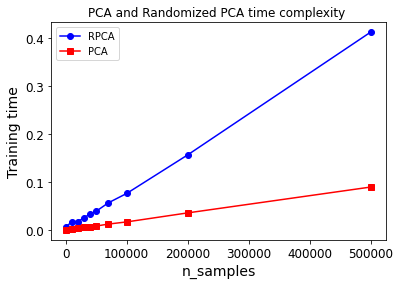

In [56]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

이번에는 특성의 개수를 달리하면서 2,000 샘플이 있는 데이터셋에서 성능을 비교해 보겠습니다:

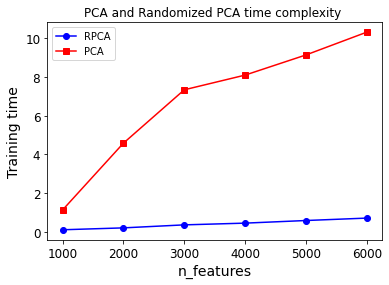

In [57]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components=2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")
plt.show()

## 4. 커널 PCA

**커널 트릭**

샘플은 매우 고차원 공간(특성 공간)으로 암묵적으로 매핑하여 서포트 벡터 머신의 비선형 분류와 회귀를 가능하게 하는 수학적 기법
->고차원 특성 공간에서의 선형 결정 경계는 원본공간에서는 복잡한 비선형 결정 경계 에 해당한다.

**커널 PCA**

같은 기법을 PCA에 적용해 차원 축소를 위한 복잡한 비선형 투형 수행 가능하게 하는것
- 투영된 후 샘플의 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터셋을 펼칠 때도 유용하다.

KernelPCA를 사용해 RBF 커널로 kPCA 적용

In [58]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [59]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

**<그림 8-10. 여러 가지 커널의 kPCA를 사용해 2D로 축소시킨 스위스 롤> 생성 코드**

그림 저장 kernel_pca_plot


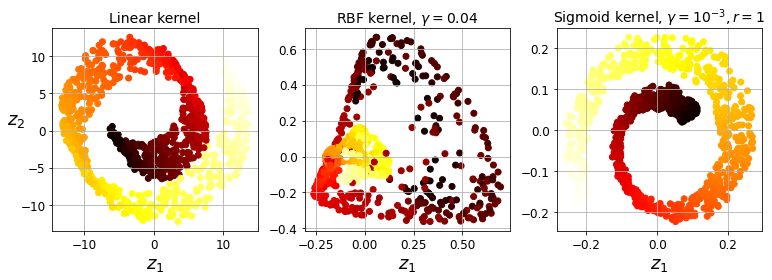

In [60]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

save_fig("kernel_pca_plot")
plt.show()

1. 선형 커널 2. RBF 코널 3. 시그모이드 커널

**<그림 8-11. 커널 PCA와 재구성 원상 오차> 생성 코드**

그림 저장 preimage_plot


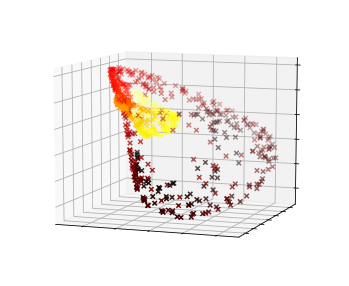

In [61]:
plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

save_fig("preimage_plot", tight_layout=False)
plt.show()

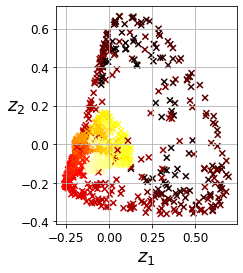

In [62]:
X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

##4.1 커널 선택과 하이퍼파라미터 튜닝

-KPCA는 비지도 학습이므로, 좋은 커널과 하이퍼파라미터 선택을 위한 명확한 성능 측정 기준이 없다.
-차원 축소는 종종 지도학습(ex.분류)의 전처리 단계로 활용되므로 그리드 탐색을 사용하여 주어진 문제에서 성능이 가장 좋은 커널과 하이퍼파라미터를 선택할 수 있다.

- 다음 코드는 두 단계의 파이프라인으로,
- 먼저 kPCA를 사용해 차원을 2단계로 축소하고
- 분류를 위해 로지스틱 회귀를 적용
- 그 후 파이프라인 마지막 단계에서 가장 높은 분류 정확도를 얻기 위해 GridSearchCV를 사용해 kPCA의 가장 좋은 커널과 gamma 파라미터를 찾는다.

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [64]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


가장 좋은 커널, 하이퍼파라미터는 best_params_변수에 저장됨

**재구성**

완전한 비지도 학습 방법으로, 가장 낮은 재구성 오차를 만드는 커널과 하이퍼파라미터를 선택하는 방식도 있다.
- 재구성은 선형 PCA만큼 쉽지 않다.
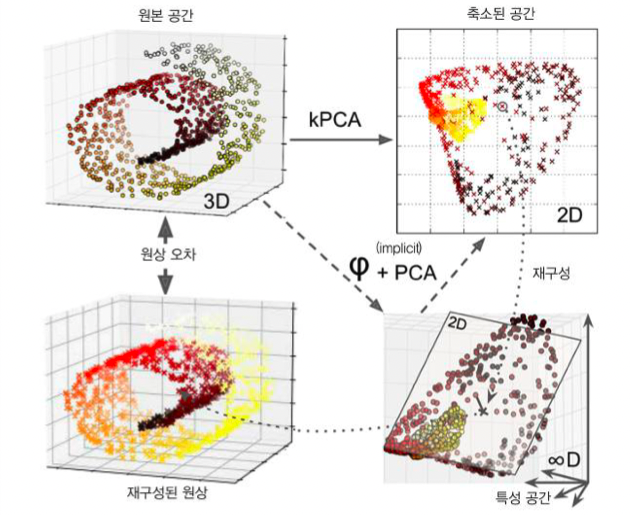


- 스위스 롤의 원본 3D 데이터셋(왼쪽 위) 과 RBF 커널의 kPCA를 적용한 2D 데이터 셋(오른쪽 위) 를 보여준다.
- 커널 트릭 덕분에 이 변환은 특성 맵을 사용하여 훈련 세트를 무한 차원의 특성 공간(오른쪽 아래)에 매핑한 다음, 변환된 데이터셋을 선형 PCA를 사용해 2D로 투영한 것과 수학적으로 동일하다.
- 축소된 공간에 있는 샘플에 대해 선형 PCA를 역전시키면 재구성된 데이터 포인트는 원본 공간이 아니라 특성 공간에 놓이게 된다 (예를들어 그림에서 x로 표현 한 것 처럼) 
  - 이 특성 공간은 무한 차원으로 재구성된 포인트를 계싼할 수 없고 실제 에러 계산이 불가능하다.
  - 다행히 재구성된 포인터에 가깝게 매핑된 원본 공간의 포인트를 찾을 수 있는데 => **재구성 원상**
  - 원상을 얻게 되면 원본 샘플과의 제곱 거리 추정 가능
  - -> 재구성 원상의 오차를 최소화 하는 커널과 하이퍼파라미터를 선택할 수 있다.

재구성 방법
- 투영된 샘플을 훈련 세트로, 원본 샘플을 타깃으로 하는 지도 학습 회귀 모델을 훈련한다.
- 사이킷 헌 fit_inverse_transform=True로 지정하면 자동으로 실행한다.

In [65]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

재구성 원상 오차 계산

In [66]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.78630879576612

## 5.LLE

자역 선형 임베딩 (LLE, Locally Linear enbedding)
또 다른 강력한 비선형 차원 축소(NLDR) 기술
- 이전 알고리즘 처럼 투영에 의존하지 않는 매니폴드 학습
- LLE 는 각 훈련 샘플이 가장 가까운 이웃(closet neighbor)에 얼마나 선형적으로 연관되어 있는지를 측정하는 기술이다.
- 그 후 구구부적인 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾음
- 잡음이 너무 많지 않은 경우 꼬인 매니폴드를 펼치는 데 잘 작동하게 된다.


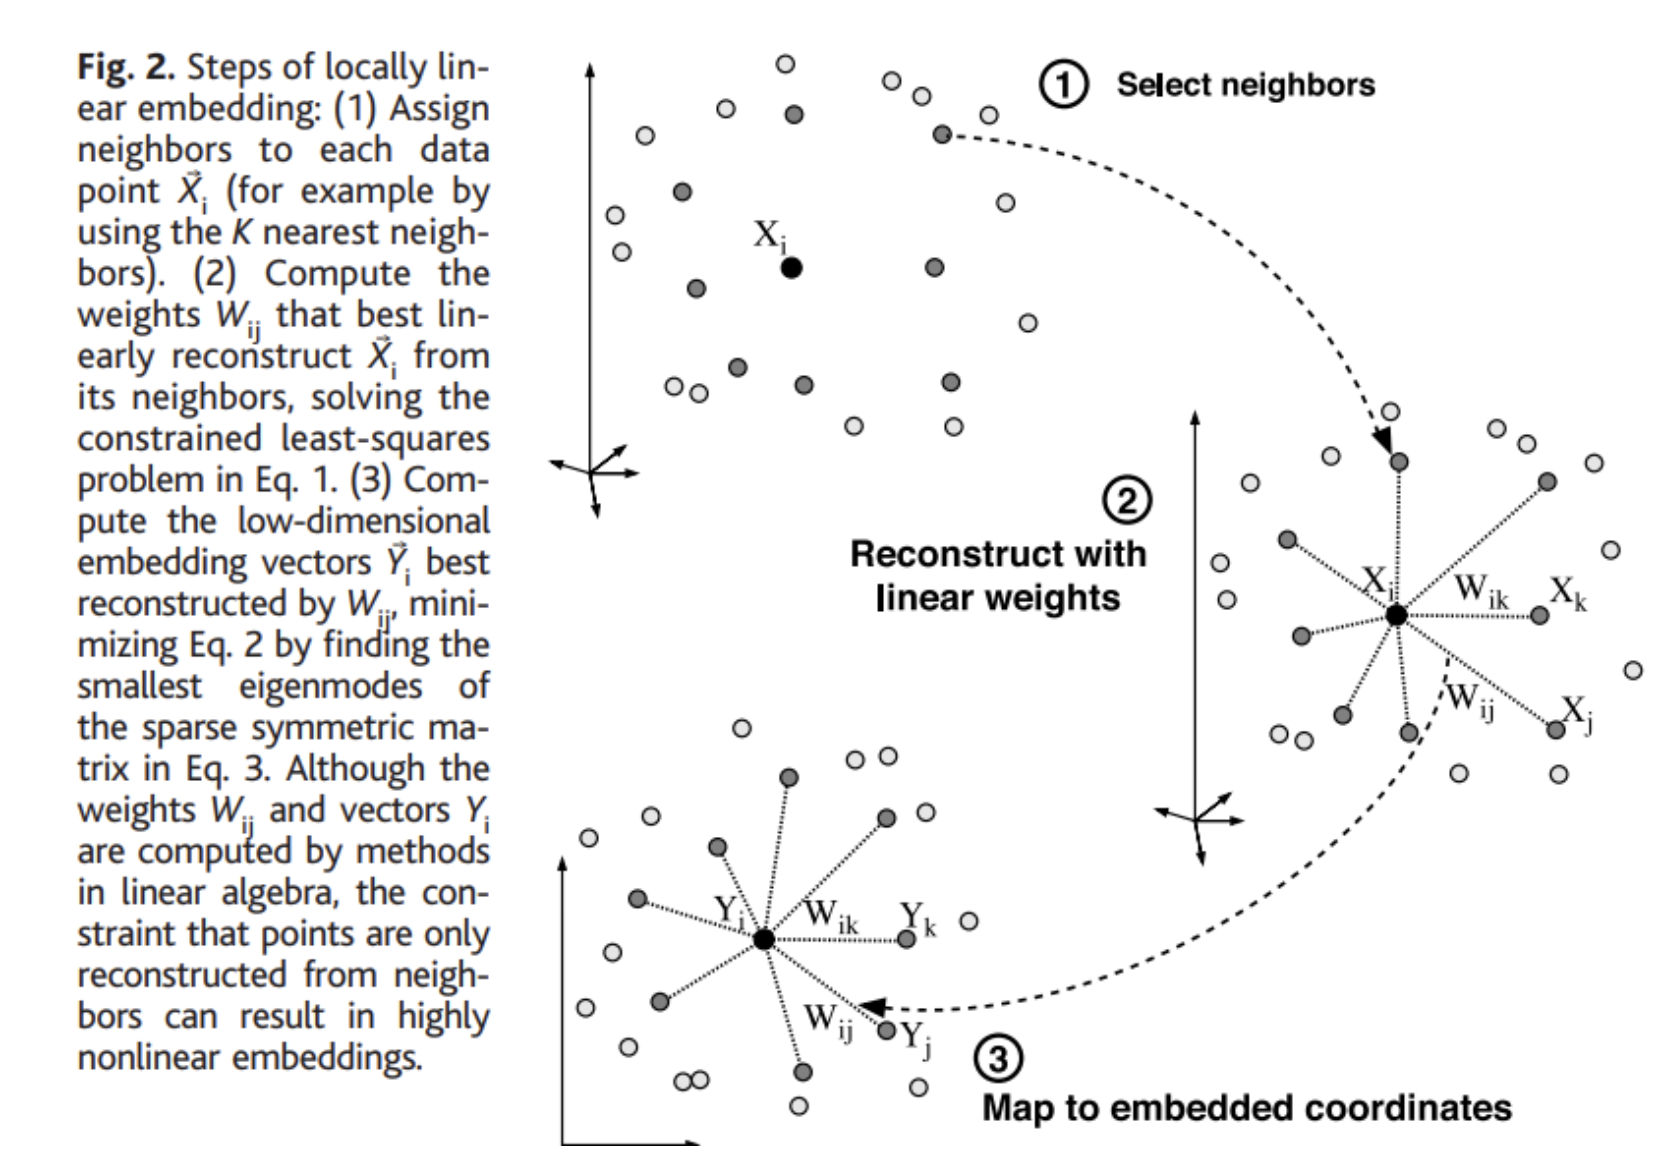

- 데이터 포인트 $X_i$에 대해 $X_i$과 가장 가까운 이웃점 $X_j$를 선택한다.

- $X_j$ 로 부터 $X_i$ 를 가장 잘 재구성하는 $W_{ij}$ 를 구한다.
  - 이때 가중치 $W_{ij}$ 는 데이터 포인트 $X_i$와 $X_j$들 간의 지역 선형관계를 나타낸다.
- 이러한 관계가 최대한 보존 되도록 데이터를 저차원인 d 차원공간으로 매핑하는것이 LLE

In [67]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

LocallyLinearEmbedding을 사용해 스위스 롤을 펼친다.

In [68]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

그림 저장 lle_unrolling_plot


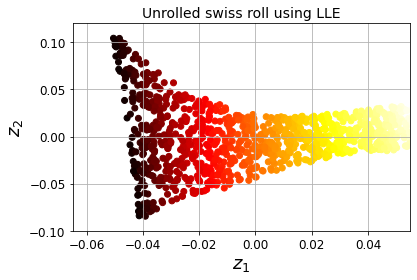

In [69]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

save_fig("lle_unrolling_plot")
plt.show()

- 스위스 롤이 완전히 펼쳐졌고, 지역적으로는 샘플 간 거리가 잘 보존되어 있다.
- 반면에 크게 보면 샘플 간 거리가 잘 유지되어 있지 않음
- 펼쳐진 스위스 롤의 오른쪽은 압축되어 있고, 왼쪽은 확장되어 있다.
  -> 그럼에도 불구하고, **LLE는 매니폴드를 모델링하는데 잘 동작한다**

  

**LLE가 작동하는 방식**

1. 먼저 알고리즘이 각 훈련 샘플 X(i)에 대해 가장 가까운 k 개의 샘플을 찾음( 앞 코드에선 k=10)
 - 그런 다음 이 이웃에 대한 선형함수로 X(i)를 재구성
 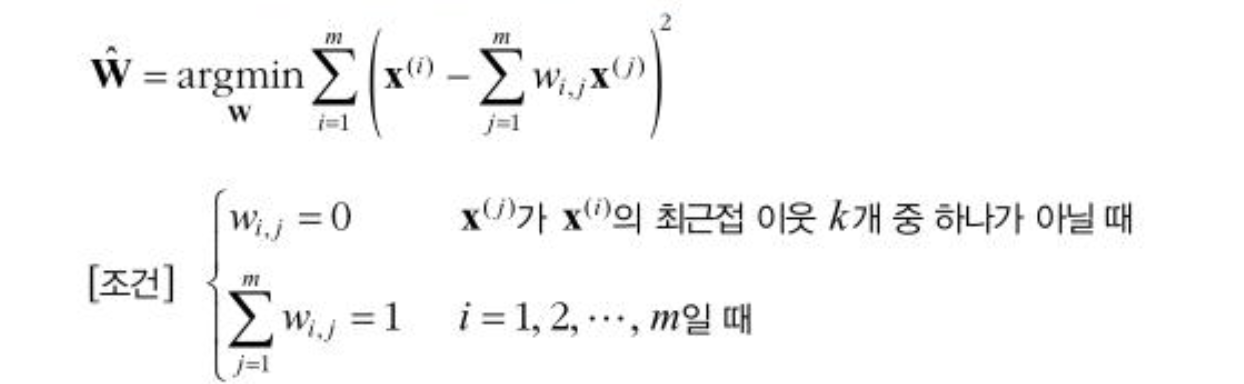

  - X(j)가 X(i)의 가장 가까운 k 개의 이웃 중 하나가 아닐 경우 $w_{i,j}$=0 이 된다.
  - 그러므로 LLE의 첫 단계는 위 식 처럼 제한이 있는 최적화 문제가 된다.
  - W는 가중치 $w_{i,j}$를 모두 담은 가중치 행렬
  - 두 번째 제약은 각 훈련 샘플 X(i)에 대한 가중치를 단순히 정규화 하는 것이다.
  - 이 단계를 거치면 (가중치 $\hat{w_{i,j}}$를 담은) 가중치 행렬 $\hat{W}$ 은 훈련 샘플 사이에 있는 지역 선형 관계를 담고 있다.

  2. 두번 째 단계는 가능한 한 이 관계가 보존되도록 훈련샘플을 d 차원 공간(d<n)으로 매핑
  - 만약 z(i)가 d차원 공간에서 x(i)의 상(image)이라면 가능한 한 z(i)와 $∑\hat{w_{i,j}} *z(i)$ 사이의 거리가 최소화 되어야 한다.
  - 첫 번째 단계는 샘플을 고정하고 최적의 가중치를 찾지만, 두 번째 단계에서는 가중치를 고정하고 저차원의 공간에서 샘플 이미지의 최적 위치를 찾는다.
  - Z는 모든 z(i)를 포함하는 행렬이다.
  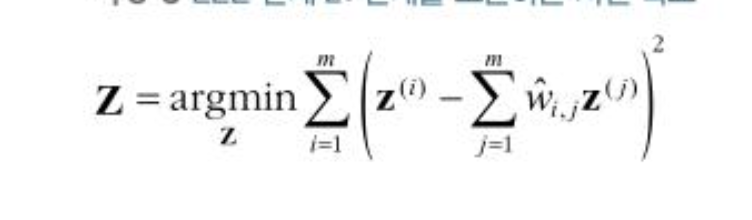

## 6.다른 차원 축소 기법

- **랜덤투영**(random projection)

    랜덤한 선형 투영을 사용해 데이터를 저차원 공간으로 투영한다.
    - 이러한 랜덤 투영이 실제로 거리를 잘 보존한다.
    - 차원 축소 품질은 샘플 수와 목표 차원수에 따라 다르며, 초기 차원수에는 의존하지 않는다.

- **다차원 스케일링(MDS)**(multidimensional scaling)

    샘플간의 거리를 보존하며 차원을 축소한다.
  
- **Isomap**

    각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만든다.
    - 그 후 샘플 간의 지오데식 거리(두 노드 사이의 최단 경로를 이루는 노드의 수)를 유지하면서 차원을 축소 시킨다.

- **t-SNE**

    비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원을 축소
    - 주로 시각화에 많이 사용
    - 특히 고차원 공간에 있는 샘플의 군집을 시각화 할 때 사용한다.

- **선형 판별 분석**

    분류 알고리즘이지만, 훈련과정에서 클래스 사이를 가장 잘 구분하는 축을 학습한다.

    - 이 축은 데이터사 투영되는 초평면을 정의하는데 사용된다.
    - 투영을 통해 가능한 한 클래스를 멀리 떨어지게 유지시키므로 SVM 분류기 같은 다른 분류 알고리즘을 적용하기 전에 차원을 축소 시키는데 좋다.
    

In [70]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [71]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [72]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

**<그림 8-13. 여러 가지 기법을 사용해 스위스 롤을 2D로 축소하기> 생성 코드**

그림 저장 other_dim_reduction_plot


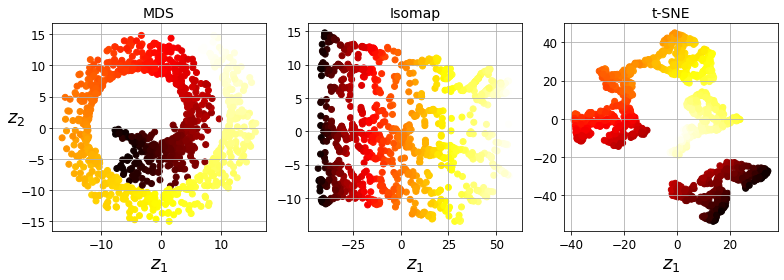

In [74]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

save_fig("other_dim_reduction_plot")
plt.show()